#  PART A: TIME SERIES

## Name: Haaris Bin Sulaiman
## Class: DAAA/FT/2A/01
## Admin No: 2112815

## IMPORTING

In [1]:
# Date - date
# T - temperature
# RH - relative humidity
# Gas - type of pollution gas
# Value - amount of pollution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test.tail()

,id,Date,T,RH,Gas,Unnamed: 5,Unnamed: 6
247,247,5/4/2017,17.554167,50.092708,O3,NaN,NaN
248,248,6/4/2017,15.919792,35.959722,O3,NaN,NaN
249,249,7/4/2017,15.489583,32.213542,O3,NaN,NaN
250,250,8/4/2017,18.381250,33.686458,O3,NaN,NaN
251,251,9/4/2017,16.966667,42.791667,O3,NaN,NaN


In [5]:
test.head()

,id,Date,T,RH,Gas,Unnamed: 5,Unnamed: 6
0,0,6/2/2017,6.616667,51.734375,CO,NaN,NaN
1,1,7/2/2017,7.613194,43.930903,CO,NaN,NaN
2,2,8/2/2017,7.252083,50.966667,CO,NaN,NaN
3,3,9/2/2017,7.473611,50.166319,CO,NaN,NaN
4,4,10/2/2017,5.571875,46.604167,CO,NaN,NaN


In [6]:
train.tail()

,Date,T,RH,Gas,Value,Unnamed: 5,Unnamed: 6
1307,1/2/2017,5.267708,39.614930,O3,553.180556,NaN,NaN
1308,2/2/2017,-55.515972,-24.010417,O3,343.500000,NaN,NaN
1309,3/2/2017,-14.272917,28.563542,O3,334.458333,NaN,NaN
1310,4/2/2017,4.848611,37.832986,O3,379.513889,NaN,NaN
1311,5/2/2017,7.273958,31.809375,O3,947.333333,NaN,NaN


In [7]:
train.head()

,Date,T,RH,Gas,Value,Unnamed: 5,Unnamed: 6
0,15/3/2016,12.020833,54.883334,CO,1053.200000,NaN,NaN
1,16/3/2016,9.833333,64.069791,CO,995.250000,NaN,NaN
2,17/3/2016,11.292708,51.107292,CO,1025.250000,NaN,NaN
3,18/3/2016,12.866319,51.530903,CO,1064.444444,NaN,NaN
4,19/3/2016,16.016667,48.843750,CO,1088.741667,NaN,NaN


## DATA EXPLORATION AND CLEANING

In [8]:
train = train.drop(['Unnamed: 5','Unnamed: 6'],axis = 1)

In [9]:
train.head()

,Date,T,RH,Gas,Value
0,15/3/2016,12.020833,54.883334,CO,1053.200000
1,16/3/2016,9.833333,64.069791,CO,995.250000
2,17/3/2016,11.292708,51.107292,CO,1025.250000
3,18/3/2016,12.866319,51.530903,CO,1064.444444
4,19/3/2016,16.016667,48.843750,CO,1088.741667


In [10]:
test = test.drop(['Unnamed: 5','Unnamed: 6'],axis = 1)

In [11]:
test.head()

,id,Date,T,RH,Gas
0,0,6/2/2017,6.616667,51.734375,CO
1,1,7/2/2017,7.613194,43.930903,CO
2,2,8/2/2017,7.252083,50.966667,CO
3,3,9/2/2017,7.473611,50.166319,CO
4,4,10/2/2017,5.571875,46.604167,CO


In [12]:
train.shape

(1312, 5)

In [13]:
test.shape

(252, 5)

In [14]:
train.dtypes

Date      object
T        float64
RH       float64
Gas       object
Value    float64
dtype: object

In [15]:
test.dtypes

id        int64
Date     object
T       float64
RH      float64
Gas      object
dtype: object

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1312 non-null   object 
 1   T       1312 non-null   float64
 2   RH      1312 non-null   float64
 3   Gas     1312 non-null   object 
 4   Value   1312 non-null   float64
dtypes: float64(3), object(2)
memory usage: 51.4+ KB


In [17]:
test.info

<bound method DataFrame.info of       id       Date          T         RH Gas
0      0   6/2/2017   6.616667  51.734375  CO
1      1   7/2/2017   7.613194  43.930903  CO
2      2   8/2/2017   7.252083  50.966667  CO
3      3   9/2/2017   7.473611  50.166319  CO
4      4  10/2/2017   5.571875  46.604167  CO
..   ...        ...        ...        ...  ..
247  247   5/4/2017  17.554167  50.092708  O3
248  248   6/4/2017  15.919792  35.959722  O3
249  249   7/4/2017  15.489583  32.213542  O3
250  250   8/4/2017  18.381250  33.686458  O3
251  251   9/4/2017  16.966667  42.791667  O3

[252 rows x 5 columns]>

In [18]:
train.isna().sum()

Date     0
T        0
RH       0
Gas      0
Value    0
dtype: int64

In [19]:
test.isna().sum()

id      0
Date    0
T       0
RH      0
Gas     0
dtype: int64

In [20]:
train.describe()

,T,RH,Value
count,1312.000000,1312.000000,1312.000000
mean,11.634917,39.873729,750.218839
std,37.041779,43.217836,225.520132
min,-200.000000,-200.000000,-160.000000
25%,12.387760,36.348177,648.370833
50%,18.832292,46.078993,769.370833
75%,25.557118,57.932292,880.570833
max,32.997917,81.104167,1436.233333


In [21]:
tt = test
tt['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)
tt.set_index('Date', inplace=True)
t = test.groupby('Date').mean()['T']
rh = test.groupby('Date').mean()['RH']
tt['T'] = t
tt['RH'] = rh
tt

,id,T,RH,Gas
Date,,,,
2017-06-02,0,6.616667,51.734375,CO
2017-07-02,1,7.613194,43.930903,CO
2017-08-02,2,7.252083,50.966667,CO
2017-09-02,3,7.473611,50.166319,CO
2017-10-02,4,5.571875,46.604167,CO
...,...,...,...,...
2017-05-04,247,17.554167,50.092708,O3
2017-06-04,248,15.919792,35.959722,O3
2017-07-04,249,15.489583,32.213542,O3


In [22]:
gases = train
gases['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
gases.set_index('Date', inplace=True)
t = gases.groupby('Date').mean()['T']
rh = gases.groupby('Date').mean()['RH']
gases = gases.pivot( columns = 'Gas', values = 'Value')
gases['T'] = t
gases['RH'] = rh
gases

Gas,CO,HC,NO2,O3,T,RH
Date,,,,,,
2016-03-15,1053.200000,729.800000,933.800000,876.833333,12.020833,54.883334
2016-03-16,995.250000,681.441667,1021.750000,708.025000,9.833333,64.069791
2016-03-17,1025.250000,806.583333,881.375000,867.375000,11.292708,51.107292
2016-03-18,1064.444444,794.258333,794.527778,996.625000,12.866319,51.530903
2016-03-19,1088.741667,755.083333,800.883333,987.341667,16.016667,48.843750
...,...,...,...,...,...,...
2017-02-01,729.422222,562.650000,797.647222,553.180556,5.267708,39.614930
2017-02-02,474.291667,347.480556,508.180556,343.500000,-55.515972,-24.010417
2017-02-03,615.700000,414.475000,819.733333,334.458333,-14.272917,28.563542


### INTERPOLATON

In [23]:
gases.loc[(gases['RH'] < 0) | (gases['HC'] < 0) | (gases['NO2'] < 0) | (gases['O3'] < 0) | (gases['CO'] < 0), :] = np.nan
gases.isna().sum()

Gas
CO     16
HC     16
NO2    16
O3     16
T      16
RH     16
dtype: int64

In [24]:
gases.interpolate(method='linear', inplace=True)
gases.isna().sum()

Gas
CO     0
HC     0
NO2    0
O3     0
T      0
RH     0
dtype: int64

## EXPLORY DATA ANALYSIS

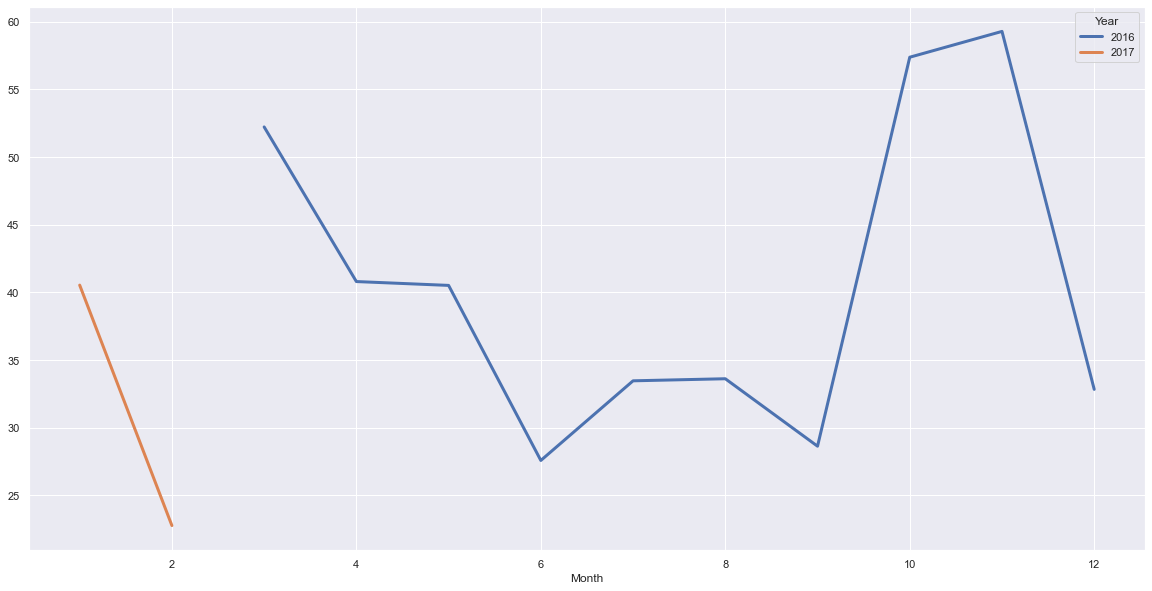

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = train
season['Date'] = train.index
season['Year'] = train.index.year
season['Month'] = train.index.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'RH' , aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

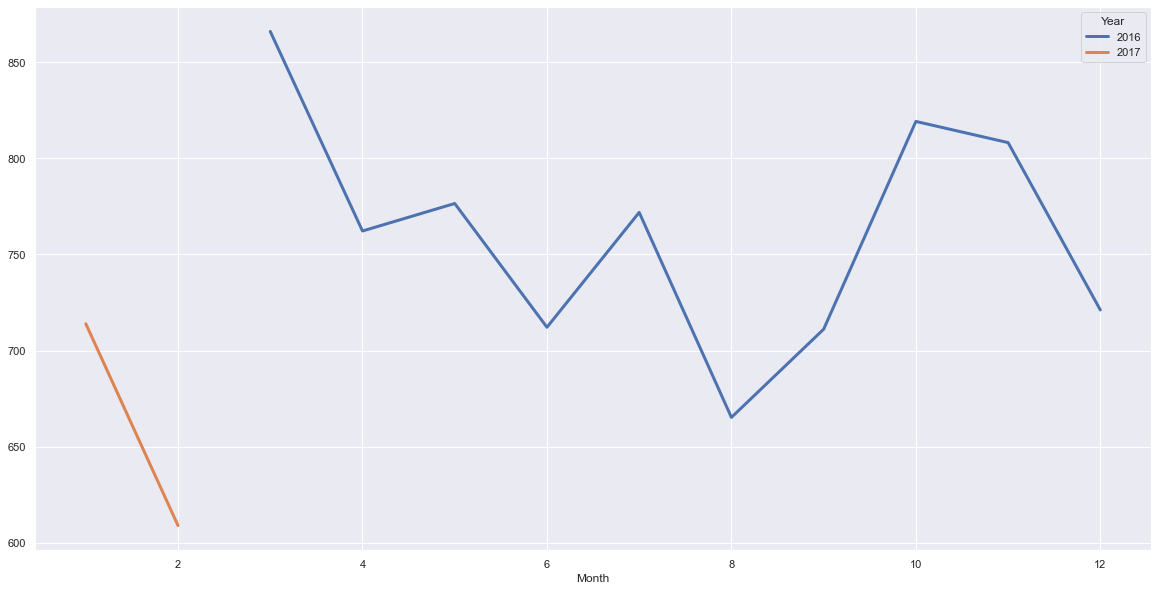

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = train
season['Date'] = train.index
season['Year'] = train.index.year
season['Month'] = train.index.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Value' , aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

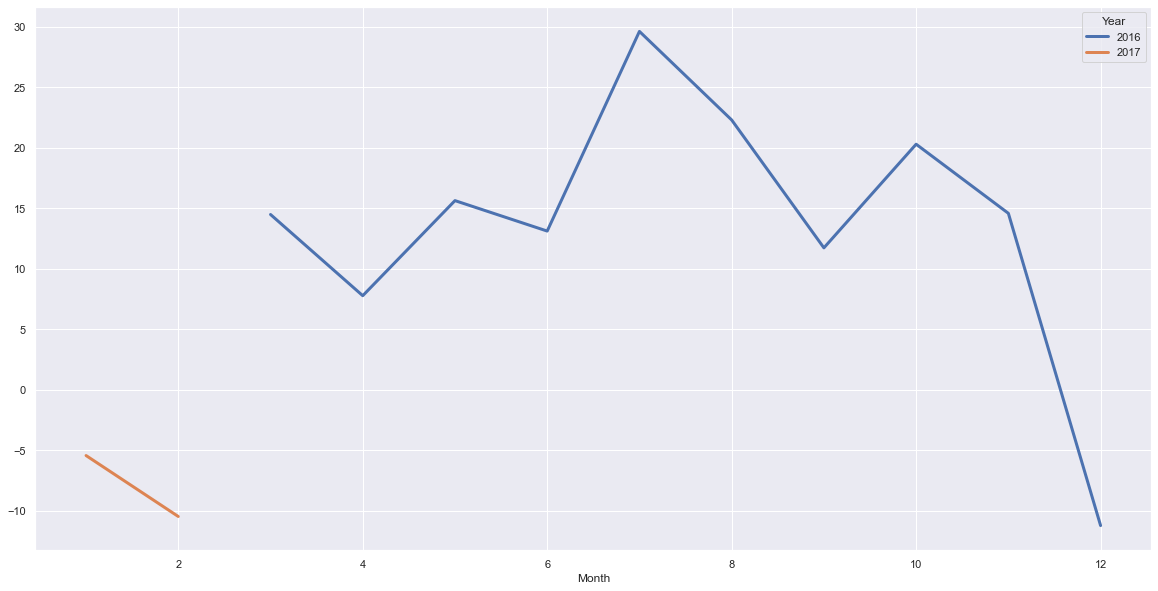

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = train
season['Date'] = train.index
season['Year'] = train.index.year
season['Month'] = train.index.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'T' , aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

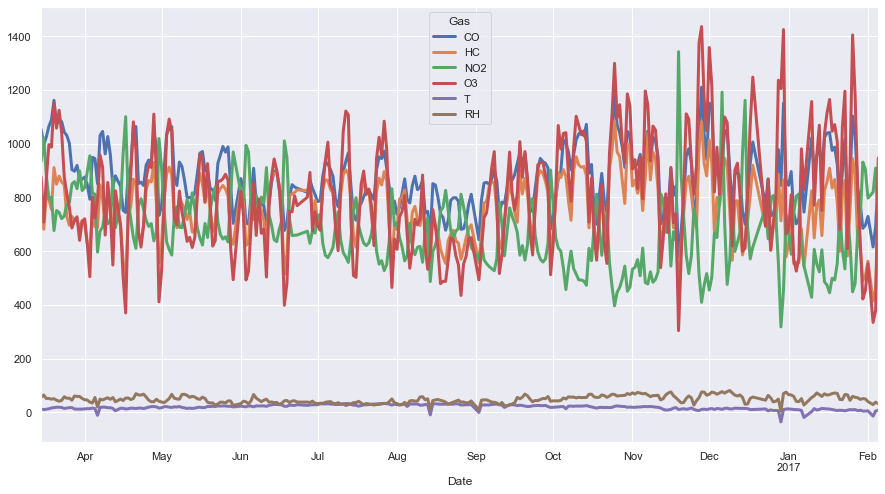

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
gases.plot(figsize=(15,8), linewidth=3)
plt.show()

## STATIONARITY

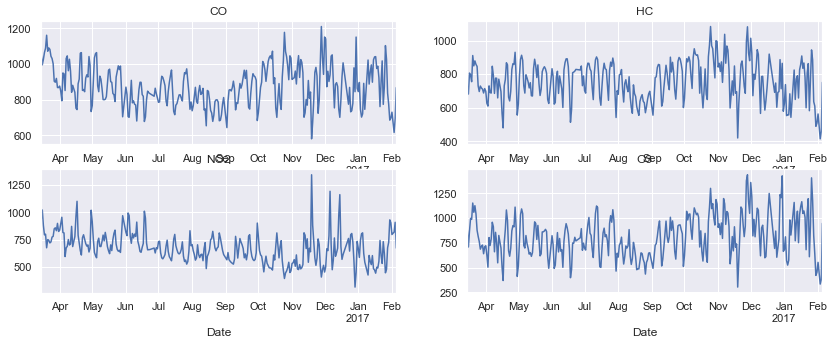

In [30]:
# Visual Check
fig, ax = plt.subplots(2, 2, figsize=(14, 5))
gases['CO'].plot(ax=ax[0,0])
gases['HC'].plot(ax=ax[0,1])
gases['NO2'].plot(ax=ax[1,0])
gases['O3'].plot(ax=ax[1,1])
ax[0,0].set_title('CO')
ax[0,1].set_title('HC')
ax[1,0].set_title('NO2')
ax[1,1].set_title('O3')
plt.show()

In [31]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
print('p-value for')
print('CO:%f' % adfuller(gases['CO'])[1])
print('HC %f' % adfuller(gases['HC'])[1])
print('NO2 %f' % adfuller(gases['NO2'])[1])
print('O3 %f' % adfuller(gases['O3'])[1])

Results of Dickey-Fuller Test:
p-value for
CO:0.000143
HC 0.014027
NO2 0.001284
O3 0.016685


In [32]:
#  the p-value is much smalle than 0.05, therefore we reject the null hypothesis. The time series is stationary

## Seasonality Decomposition

<Figure size 864x576 with 0 Axes>

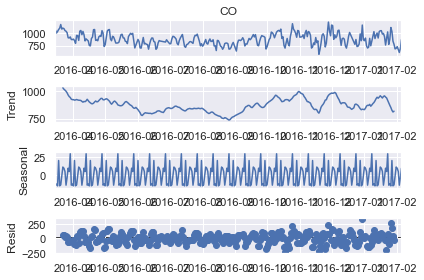

<Figure size 864x576 with 0 Axes>

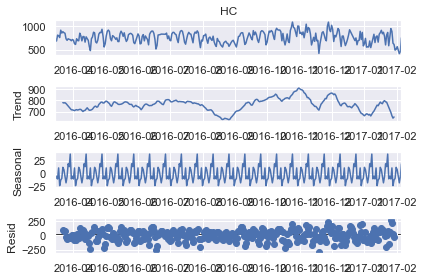

<Figure size 864x576 with 0 Axes>

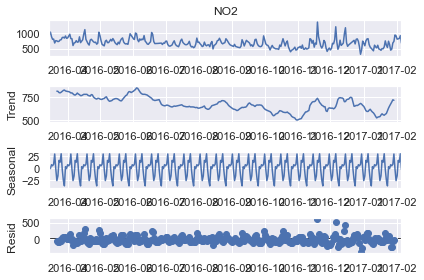

<Figure size 864x576 with 0 Axes>

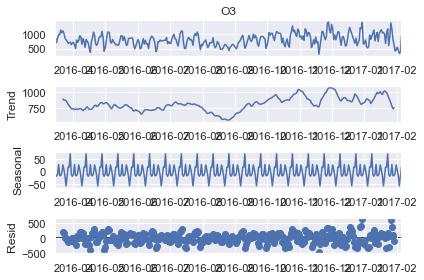

<Figure size 864x576 with 0 Axes>

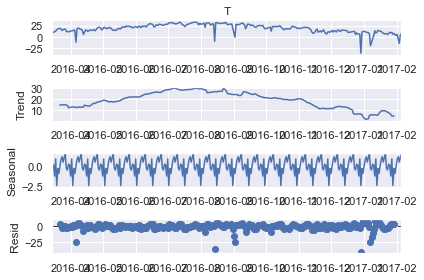

<Figure size 864x576 with 0 Axes>

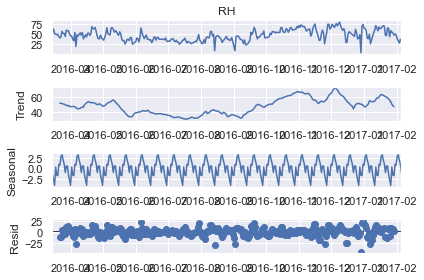

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in gases.columns:
    decomposition = seasonal_decompose(gases[i], model='additive', freq = 15)
    fig = plt.figure(figsize=(12, 8))
    fig = decomposition.plot()

# MODEL SELECTION

## Simple Moving Average

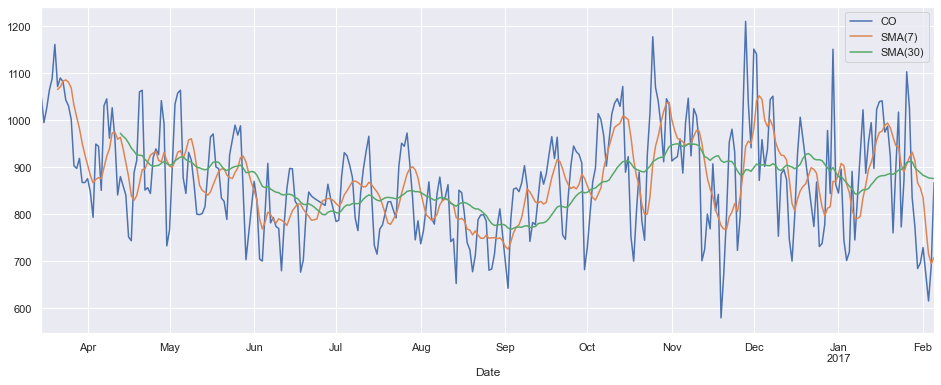

In [34]:
co = gases['CO']
ax = co.plot(figsize=(16, 6))
co.rolling(window=7).mean().plot(ax=ax)
co.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['CO', 'SMA(7)', 'SMA(30)'])
plt.show()

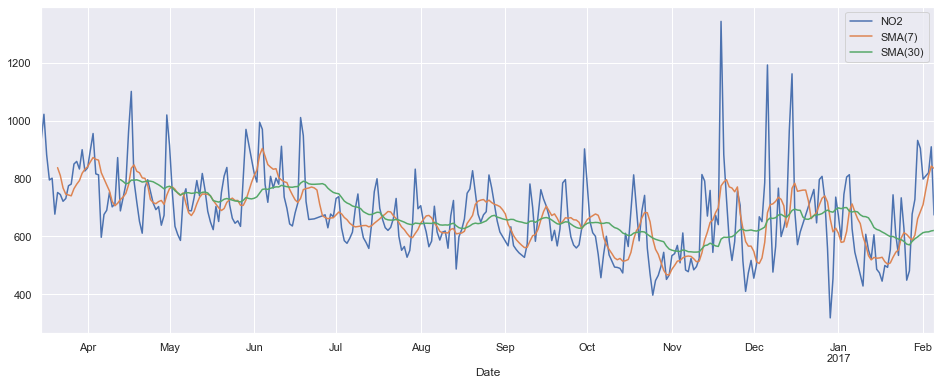

In [35]:
no2 = gases['NO2']
ax = no2.plot(figsize=(16, 6))
no2.rolling(window=7).mean().plot(ax=ax)
no2.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['NO2', 'SMA(7)', 'SMA(30)'])
plt.show()

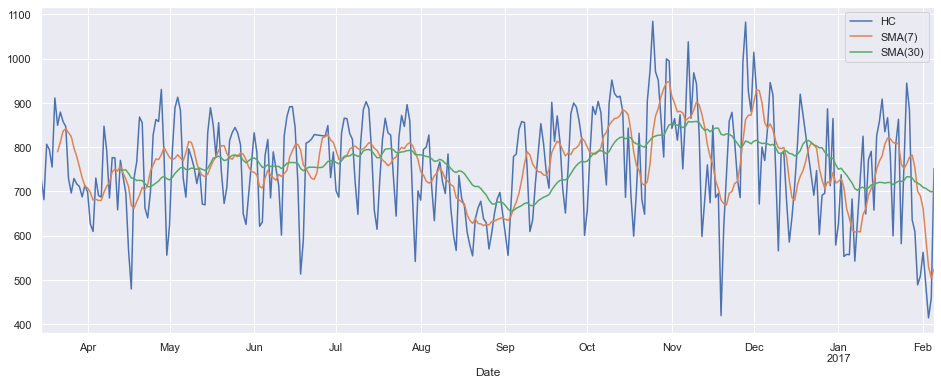

In [36]:
hc = gases['HC']
ax = hc.plot(figsize=(16, 6))
hc.rolling(window=7).mean().plot(ax=ax)
hc.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['HC', 'SMA(7)', 'SMA(30)'])
plt.show()

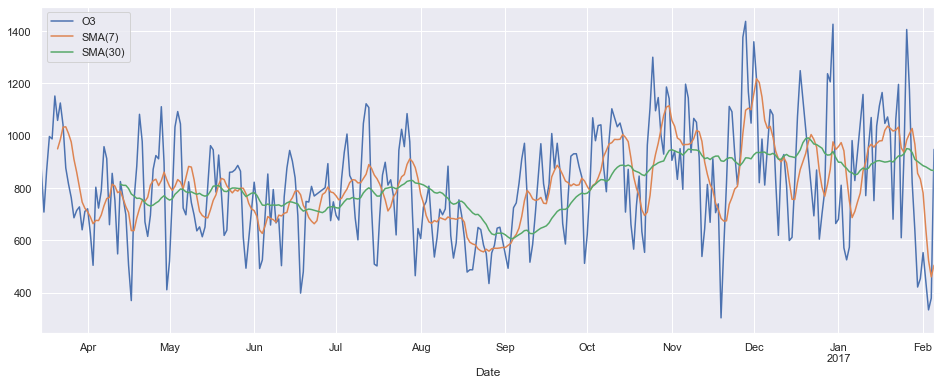

In [37]:
o3 = gases['O3']
ax = o3.plot(figsize=(16, 6))
o3.rolling(window=7).mean().plot(ax=ax)
o3.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['O3', 'SMA(7)', 'SMA(30)'])
plt.show()

## Holt-Winters Simple Exponential Smoothing

In [55]:
CO = gases['CO']
training = CO[CO.index<'2016-12-1']
testing = CO[CO.index>='2016-12-1']

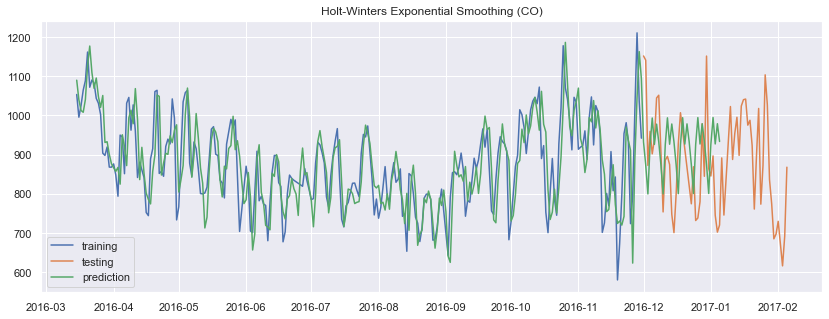

In [56]:
# Exponential Smoothing Model
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(training, seasonal_periods=7, trend='add', seasonal='add',damped_trend=True).fit()
pred1 = es_model.predict(start='2016-3-15', end='2017-1-5')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing (CO)')
plt.show()

In [57]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(training, CO[CO.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, CO[CO.index>='2016-12-1'])
print(f'Model Mean Absolute Percentage Error on training data for CO is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data for CO is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data for CO is 0.00%
Model Mean Absolute Percentage Error on testing data for CO is 0.00%


In [58]:
NO2 = gases['NO2']
training = NO2[NO2.index<'2016-12-1']
testing = NO2[NO2.index>='2016-12-1']

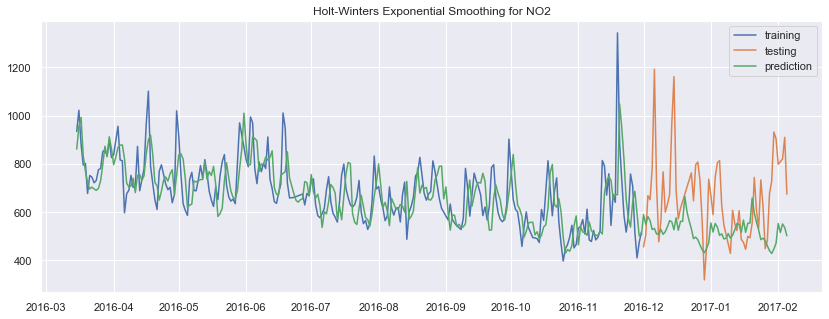

In [59]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(training, seasonal_periods=31, trend='add', seasonal='add',damped_trend=True, freq='D').fit()
pred1 = es_model.predict(start='2016-3-15', end='2017-2-5')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing for NO2')
plt.show()


In [60]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(training, NO2[NO2.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, NO2[NO2.index>='2016-12-1'])
print(f'Model Mean Absolute Percentage Error on training data for NO2 is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data for NO2 is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data for NO2 is 0.00%
Model Mean Absolute Percentage Error on testing data for NO2 is 0.00%


In [61]:
HC = gases['HC']
training = HC[HC.index<'2016-12-1']
testing = HC[HC.index>='2016-12-1']

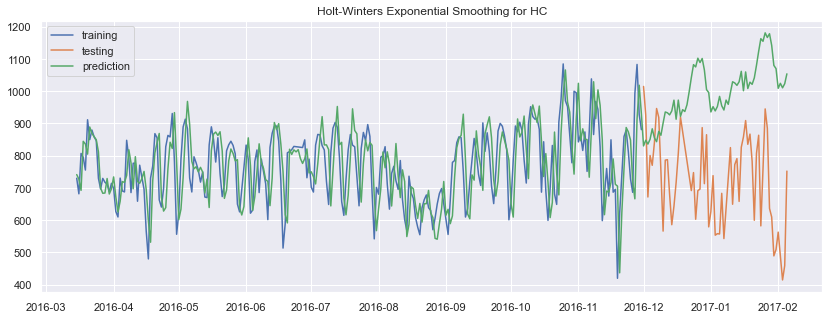

In [62]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(training, seasonal_periods=31, trend='add', seasonal='add',
damped_trend=True, freq='D').fit()
pred1 = es_model.predict(start='2016-3-15', end='2017-2-5')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing for HC')
plt.show()


In [63]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(training, HC[HC.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, HC[HC.index>='2016-12-1'])
print(f'Model Mean Absolute Percentage Error on training data for HC is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data for HC is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data for HC is 0.00%
Model Mean Absolute Percentage Error on testing data for HC is 0.00%


In [65]:
O3 = gases['O3']
training = O3[O3.index<'2016-12-1']
testing = O3[O3.index>='2016-12-1']

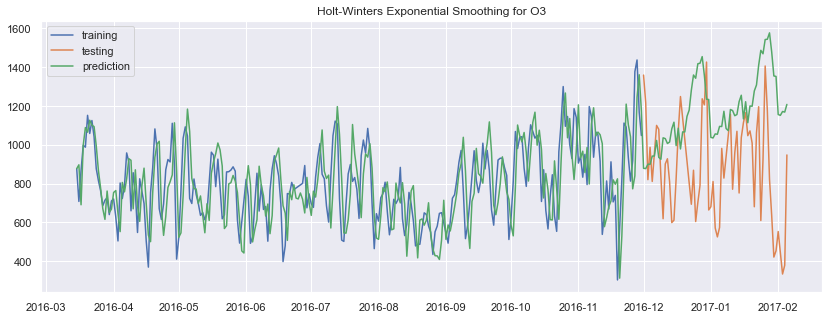

In [66]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(training, seasonal_periods=31, trend='add', seasonal='add',
damped_trend=True, freq='D').fit()
pred1 = es_model.predict(start='2016-3-15', end='2017-2-5')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing for O3')
plt.show()


In [67]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(training, O3[O3.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, O3[O3.index>='2016-12-1'])
print(f'Model Mean Absolute Percentage Error on training data for O3 is {mape_train*100:.2f}%'
)
print(f'Model Mean Absolute Percentage Error on testing data for 03 is {mape_test*100:.2f}%')


Model Mean Absolute Percentage Error on training data for O3 is 0.00%
Model Mean Absolute Percentage Error on testing data for 03 is 0.00%


# SARIMAX

In [68]:
exog = ['T','RH']

NITROGEN DIOXIDE

In [69]:
NO2 = gases['NO2']
# define training and testing dataset
training = NO2[NO2.index<'2016-12-1']
testing = NO2[NO2.index>='2016-12-1']

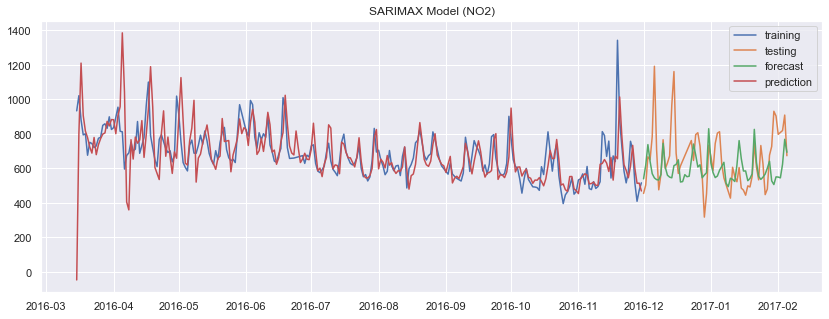

In [70]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
smx = SARIMAX(
            training,
            order=(2,1,4),
            seasonal_order=(1,1,2,21),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = gases[exog].iloc[0:-67]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
train_pred = smxResult.get_prediction(start =0, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
test_pred = smxResult.get_forecast(steps =67, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(test_pred.index, test_pred, label='forecast')
ax.plot(train_pred.index, train_pred, label='prediction')

plt.legend()
plt.title('SARIMAX Model (NO2)')
plt.show()

In [71]:
import math
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
AIC = smxResult.aic
BIC = smxResult.bic
mape_train = mean_absolute_percentage_error(training, train_pred[train_pred.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, test_pred[test_pred.index>='2016-12-1'])
rmse_train = math.sqrt(mean_squared_error(training, train_pred[train_pred.index<'2016-12-1']))
rmse_test = math.sqrt(mean_squared_error(testing,test_pred[test_pred.index>='2016-12-1']))
print(f'AIC: {AIC}')
print(f'BIC: {BIC}')
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'Model Root Mean Squared Error on training data is {rmse_train:.2f}')
print(f'Model Root Mean Squared Error on testing data is {rmse_test:.2f}')

AIC: 2303.012219616824
BIC: 2342.1021640811573
Model Mean Absolute Percentage Error on training data is 10.63%
Model Mean Absolute Percentage Error on testing data is 18.91%
Model Root Mean Squared Error on training data is 129.10
Model Root Mean Squared Error on testing data is 180.58


CARBON MONOXIDE

In [72]:
CO = gases['CO']
# define training and testing dataset
training = CO[CO.index<'2016-12-1']
testing = CO[CO.index>='2016-12-1']

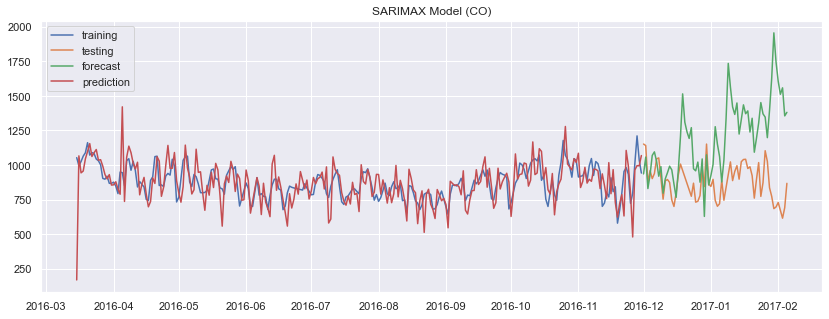

In [73]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
smx = SARIMAX(
            training,
            order=(4,1,1),
            seasonal_order=(1,1,3,21),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = gases[exog].iloc[0:-67]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
train_pred = smxResult.get_prediction(start =0, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
test_pred = smxResult.get_forecast(steps =67, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(test_pred.index, test_pred, label='forecast')
ax.plot(train_pred.index, train_pred, label='prediction')

plt.legend()
plt.title('SARIMAX Model (CO)')
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
AIC = smxResult.aic
BIC = smxResult.bic
mape_train = mean_absolute_percentage_error(training, train_pred[train_pred.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, test_pred[test_pred.index>='2016-12-1'])
rmse_train = math.sqrt(mean_squared_error(training, train_pred[train_pred.index<'2016-12-1']))
rmse_test = math.sqrt(mean_squared_error(testing,test_pred[test_pred.index>='2016-12-1']))
print(f'AIC: {AIC}')
print(f'BIC: {BIC}')
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'Model Root Mean Squared Error on training data is {rmse_train:.2f}')
print(f'Model Root Mean Squared Error on testing data is {rmse_test:.2f}')

AIC: 6789.782062701492
BIC: 6827.690726292066
Model Mean Absolute Percentage Error on training data is 9.94%
Model Mean Absolute Percentage Error on testing data is 41.49%
Model Root Mean Squared Error on training data is 120.10
Model Root Mean Squared Error on testing data is 436.55


OZONE

In [76]:
O3 = gases['O3']
# define training and testing dataset
training = O3[O3.index<'2016-12-1']
testing = O3[O3.index>='2016-12-1']

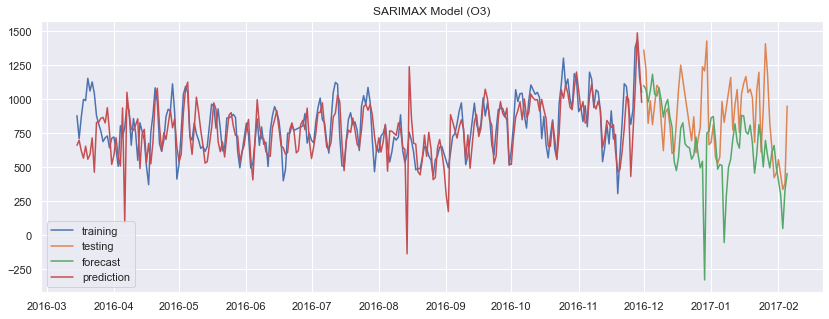

In [77]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
smx = SARIMAX(
            training,
            order=(7,0,9),
            seasonal_order=None,
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = gases[exog].iloc[0:-67]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
train_pred = smxResult.get_prediction(start =0, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
test_pred = smxResult.get_forecast(steps =67, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(test_pred.index, test_pred, label='forecast')
ax.plot(train_pred.index, train_pred, label='prediction')

plt.legend()
plt.title('SARIMAX Model (O3)')
plt.show()

In [78]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
AIC = smxResult.aic
BIC = smxResult.bic
mape_train = mean_absolute_percentage_error(training, train_pred[train_pred.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, test_pred[test_pred.index>='2016-12-1'])
rmse_train = math.sqrt(mean_squared_error(training, train_pred[train_pred.index<'2016-12-1']))
rmse_test = math.sqrt(mean_squared_error(testing,test_pred[test_pred.index>='2016-12-1']))
print(f'AIC: {AIC}')
print(f'BIC: {BIC}')
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'Model Root Mean Squared Error on training data is {rmse_train:.2f}')
print(f'Model Root Mean Squared Error on testing data is {rmse_test:.2f}')

AIC: 3261.683463352301
BIC: 3328.6670691958047
Model Mean Absolute Percentage Error on training data is 16.05%
Model Mean Absolute Percentage Error on testing data is 31.01%
Model Root Mean Squared Error on training data is 164.48
Model Root Mean Squared Error on testing data is 380.33


HYDROCARBONS

In [79]:
HC = gases['HC']
# define training and testing dataset
training = HC[HC.index<'2016-12-1']
testing = HC[HC.index>='2016-12-1']

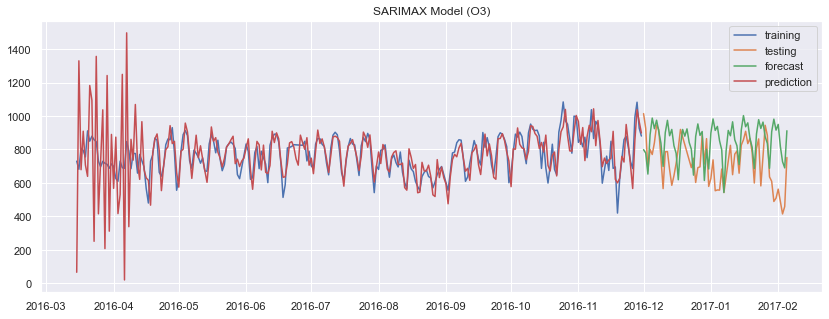

In [80]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
smx = SARIMAX(
            training,
            order=(4,1,3),
            seasonal_order=(3,1,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = gases[exog].iloc[0:-67]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
train_pred = smxResult.get_prediction(start =0, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
test_pred = smxResult.get_forecast(steps =67, exog = gases[exog].iloc[261:], dynamic = False).predicted_mean
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(training, label='training')
ax.plot(testing, label='testing')
ax.plot(test_pred.index, test_pred, label='forecast')
ax.plot(train_pred.index, train_pred, label='prediction')

plt.legend()
plt.title('SARIMAX Model (O3)')
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
AIC = smxResult.aic
BIC = smxResult.bic
mape_train = mean_absolute_percentage_error(training, train_pred[train_pred.index<'2016-12-1'])
mape_test = mean_absolute_percentage_error(testing, test_pred[test_pred.index>='2016-12-1'])
rmse_train = math.sqrt(mean_squared_error(training, train_pred[train_pred.index<'2016-12-1']))
rmse_test = math.sqrt(mean_squared_error(testing,test_pred[test_pred.index>='2016-12-1']))
print(f'AIC: {AIC}')
print(f'BIC: {BIC}')
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'Model Root Mean Squared Error on training data is {rmse_train:.2f}')
print(f'Model Root Mean Squared Error on testing data is {rmse_test:.2f}')

AIC: 2634.4851424374765
BIC: 2682.4959812428388
Model Mean Absolute Percentage Error on training data is 11.70%
Model Mean Absolute Percentage Error on testing data is 24.82%
Model Root Mean Squared Error on training data is 146.32
Model Root Mean Squared Error on testing data is 195.20


# FORECASTING

I will be using the SARIMAX model to forecast the values of the gases for the 63 given days because this model is more compatible than Holt Winters and Simple Average. The MAPE values are good and thus I will be choosing the SARIMAX to forecast. We will now be using the test data to forecast the values for each of the gases.

In [83]:
exog = ['T','RH']

HYDROCARBONS

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data_hc = gases[['HC','T','RH']]
test_hc = test[test['Gas'] == 'HC'][['T','RH']]
smx = SARIMAX(
            data_hc[['HC']],
            order=(4,1,3),
            seasonal_order=(3,1,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = data_hc[exog]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
test_prediction_hc = smxResult.predict('2017-02-06','2017-04-09',exog = test_hc)
test_prediction_hc

2017-02-06    801.254520
2017-02-07    746.461223
2017-02-08    698.217263
2017-02-09    743.545109
2017-02-10    687.183434
                 ...    
2017-04-05    700.480492
2017-04-06    728.423807
2017-04-07    671.845920
2017-04-08    555.873491
2017-04-09    731.331145
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

CARBON MONOXIDE

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data_co = gases[['CO','T','RH']]
test_co = test[test['Gas'] == 'CO'][['T','RH']]
smx = SARIMAX(
            data_co[['CO']],
            order=(4,1,1),
            seasonal_order=(1,1,3,21),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = data_co[exog]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
test_prediction_co = smxResult.predict('2017-02-06','2017-04-09',exog = test_co)
test_prediction_co

2017-02-06    967.095715
2017-02-07    917.300557
2017-02-08    963.245075
2017-02-09    933.045515
2017-02-10    885.305651
                 ...    
2017-04-05    863.165792
2017-04-06    822.368029
2017-04-07    774.036132
2017-04-08    711.663537
2017-04-09    820.263357
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

OZONE

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data_o3 = gases[['O3','T','RH']]
test_o3 = test[test['Gas'] == 'O3'][['T','RH']]
smx = SARIMAX(
            data_o3[['O3']],
            order=(7,0,9),
            seasonal_order=None,
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = data_o3[exog]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
test_prediction_o3 = smxResult.predict('2017-02-06','2017-04-09',exog = test_o3)
test_prediction_o3

2017-02-06    1152.956249
2017-02-07     908.642065
2017-02-08     913.726790
2017-02-09     926.125981
2017-02-10     839.453116
                 ...     
2017-04-05     927.640999
2017-04-06     852.464309
2017-04-07     828.684239
2017-04-08     770.821851
2017-04-09     912.652067
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

NITROGEN DIOXIDE

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data_no2 = gases[['NO2','T','RH']]
test_no2 = test[test['Gas'] == 'NO2'][['T','RH']]
smx = SARIMAX(
            data_no2[['NO2']],
            order=(2,1,4),
            seasonal_order=(1,1,2,21),
            enforce_stationarity=False,
            enforce_invertibility=False,
            trends = 'c',
            exog = data_no2[exog]
          )
# use the model to make predictions
smxResult= smx.fit(disp=0)
test_prediction_no2 = smxResult.predict('2017-02-06','2017-04-09',exog = test_no2)
test_prediction_no2

2017-02-06    591.525895
2017-02-07    736.090840
2017-02-08    612.818211
2017-02-09    575.552363
2017-02-10    656.670048
                 ...    
2017-04-05    793.525081
2017-04-06    862.748540
2017-04-07    912.782564
2017-04-08    988.303263
2017-04-09    845.403918
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

In [89]:
pd.concat([test_prediction_hc,test_prediction_co,test_prediction_o3,test_prediction_no2])

2017-02-06    801.254520
2017-02-07    746.461223
2017-02-08    698.217263
2017-02-09    743.545109
2017-02-10    687.183434
                 ...    
2017-04-05    793.525081
2017-04-06    862.748540
2017-04-07    912.782564
2017-04-08    988.303263
2017-04-09    845.403918
Name: predicted_mean, Length: 252, dtype: float64

In [90]:
results = pd.concat([test_prediction_hc,test_prediction_co,test_prediction_o3,test_prediction_no2])

In [91]:
results

2017-02-06    801.254520
2017-02-07    746.461223
2017-02-08    698.217263
2017-02-09    743.545109
2017-02-10    687.183434
                 ...    
2017-04-05    793.525081
2017-04-06    862.748540
2017-04-07    912.782564
2017-04-08    988.303263
2017-04-09    845.403918
Name: predicted_mean, Length: 252, dtype: float64

In [92]:
results.to_csv('sarimax_submission.csv')

In [95]:
sar = pd.read_csv('sarimax_submission.csv')

In [96]:
sar

,id,Value
0,0,801.254520
1,1,746.461223
2,2,698.217263
3,3,743.545109
4,4,687.183434
...,...,...
247,247,793.525081
248,248,862.748540
249,249,912.782564
250,250,988.303263
